#A-Type Potassium Channel
**Here are the gating variables for the iAMC A type potassium channel. The inf values are generic to give activation above -50. While the Tau curves are fitted to Marc Spehr's experimental data.

Populating the interactive namespace from numpy and matplotlib


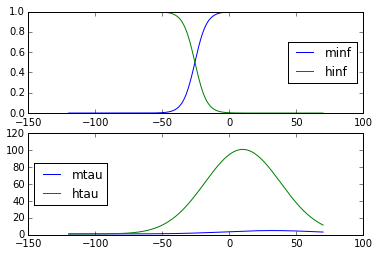

In [21]:
%pylab inline
v = np.linspace(-120,70,2000)
minf =  1 / (1 + np.exp(0 - (v + 25.7)/4.4))
hinf =  1 / (1 + np.exp(0 - (v + 25.7)/-4.4))
mtau = (1 + (4 * (np.exp(0 - np.square((v - 32)/50)))))                             
htau = (1 + (100 * (np.exp(0 - np.square((v - 10)/40)))))
subplot(2, 1, 1)
plt.plot(v, minf, v, hinf)
plt.legend(['minf', 'hinf'], loc='center right')
subplot(2, 1, 2)
plt.plot(v, mtau, v, htau)
plt.legend(['mtau', 'htau'], loc='center left')

**Here are the fits for the Tau curves. The htau curve is fitted to a rather scattered data set.**

Populating the interactive namespace from numpy and matplotlib


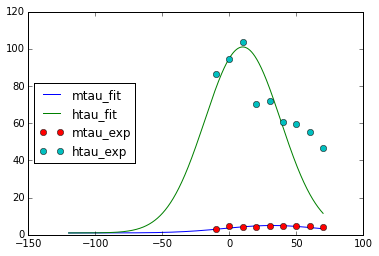

In [23]:
%pylab inline
v = np.linspace(-120,70,2000)
mtau = (1 + (4 * (np.exp(0 - np.square((v - 32)/50)))))                             
htau = (1 + (100 * (np.exp(0 - np.square((v - 10)/40)))))
vm = array ([70, 60, 50, 40, 30, 20, 10, 0, -10])
mt_exp = array ([4.4175, 4.50437, 4.71925, 4.53712, 4.7505, 4.42525, 4.04125, 4.52275, 3.032])
ht_exp = array ([46.6088, 55.3025, 59.5637, 60.8725, 72.0037, 70.3162, 103.472, 94.6238, 86.4712])
plt.plot(v, mtau, v, htau, vm, mt_exp, 'o', vm, ht_exp, 'o')
plt.legend(['mtau_fit', 'htau_fit', 'mtau_exp', 'htau_exp'], loc='center left')

**For comparison, here are the neuroConstruct generated plots:**
![alt text](m_gate_variables_KA.png)
![alt text](h_gate_variables_KA.png)

**The Tau curves are as expected, but the inf curves are reversed. Here is the ChannelML script for checking which way round are the scale values:**
```xml
	<gate name="m" instances="1">
	  <closed_state id="m0"/>
	  <open_state id="m"/>

	  <time_course name="tau" from="m0" to="m" expr_form="generic" expr="(1+4*exp(-((v-32)/50)^2))"/>
	  <steady_state name="inf" from="m0" to="m" expr_form="sigmoid" rate="1" scale="4.4" midpoint="-25.7"/>

	</gate>

	<gate name="h" instances="1">
	  <closed_state id="h0"/>
	  <open_state id="h"/>

	  <time_course name="tau" from="h0" to="h" expr_form="generic" expr="(1+100*exp(-((v-10)/40)^2))"/>
	  <steady_state name="inf" from="h0" to="h" expr_form="sigmoid" rate="1" scale="-4.4" midpoint="-25.8"/>
```